## load

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [ ]:
df = pd.read_json('new_metrics.json')
df.head(1)

In [84]:
#ddf = df[df.site_text.notna() & df.ad_desc_tit.notna() & df.ad_text.notna()]
ddf = df[df.cos_sim3.notna()]

## ddf_site

In [85]:
ddf_site = ddf.groupby('site_id').agg({
    'ad_id': list,
    'ctr': list,
    'cos_sim3': list
}).reset_index()
ddf_site['ad_count'] = ddf_site.apply(lambda x: len(x[1]), axis=1)

ddf_site.head(2)

,site_id,ad_id,ctr,cos_sim3,ad_count
0,0,"[2097, 2147, 2584, 1807, 1769, 2109, 2095, 252...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0819163546, 0.1556249261, 0.1359106153, 0.1...",12
1,1,"[2457, 2469, 1769, 2223, 2550, 2444, 2450]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009009009]","[0.498698175, 0.498698175, 0.7160774469000001,...",7


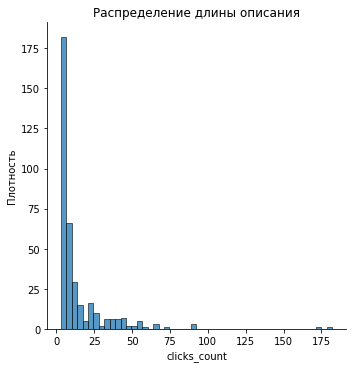

In [86]:
sns.displot(ddf_site[ddf_site.ad_count > 2].ad_count, bins=50) 

plt.title('Распределение длины описания')
plt.xlabel('clicks_count')
plt.ylabel('Плотность')
#plt.xlim((0,20))

plt.show()

## ddf_ad

In [87]:
ddf_ad = ddf.sort_values(by='ctr').groupby('ad_id').agg({
    'site_id': list,
    'ctr': list,
    'cos_sim3': list
}).reset_index()
ddf_ad['site_count'] = ddf_ad.apply(lambda x: len(x[1]), axis=1)

ddf_ad.head(2)

,ad_id,site_id,ctr,cos_sim3,site_count
0,1727,"[11, 8]","[0.0, 0.0]","[0.6218308210000001, 0.5351445675000001]",2
1,1728,"[552, 160, 86, 8, 244, 337, 198, 138, 270, 12,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.48177149890000004, 0.5301200151000001, 0.57...",13


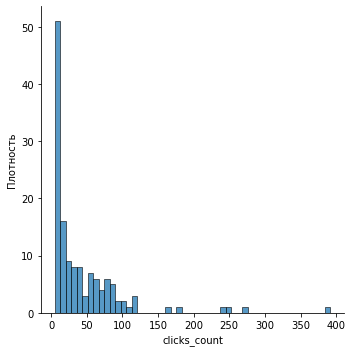

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

sns.displot(ddf_ad[ddf_ad.site_count > 4].site_count, bins=50) 

#plt.title('Распределение длины описания')
plt.xlabel('clicks_count')
plt.ylabel('Плотность')
#plt.xlim((0,20))

plt.show()

## ad_top_10_ctr

In [89]:
ad_top_10_ctr = ddf_ad.sort_values(by='site_count').iloc[-10:]
ad_top_10_ctr

,ad_id,site_id,ctr,cos_sim3,site_count
144,2520,"[152, 802, 528, 253, 205, 306, 20, 68, 1617, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.54887712, 0.6509361267, 0.7008310556, 0.689...",107
117,2469,"[453, 2, 798, 285, 216, 182, 1633, 481, 608, 6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.46284911040000004, 0.5301036835, 0.60319077...",114
109,2457,"[979, 608, 24, 294, 821, 630, 403, 25, 216, 78...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5405665636, 0.5212721825000001, 0.494010537...",117
105,2450,"[317, 205, 1279, 1370, 917, 614, 24, 229, 318,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.42011648420000003, 0.5253497958000001, 0.49...",121
154,2570,"[205, 167, 1563, 1548, 230, 250, 22, 198, 47, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2210000157, 0.4136528373, 0.2241946012, 0.1...",167
62,2288,"[747, 255, 1524, 465, 1471, 1561, 1526, 10, 11...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7582188845000001, 0.2960300446, 0.696109414...",182
212,2697,"[46, 1470, 1477, 1277, 1558, 929, 360, 498, 15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3355746269, 0.5732576847, 0.489771127700000...",239
101,2444,"[633, 647, 1522, 1538, 1542, 608, 1557, 193, 8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.47946497800000004, 0.5612766743000001, 0.45...",249
5,1807,"[81, 1535, 1546, 103, 1539, 108, 655, 47, 223,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5212820172, 0.802380085, 0.0548293628, 0.54...",274
4,1769,"[58, 216, 377, 1509, 1339, 575, 687, 1534, 486...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0876311064, 0.6275169253, 0.627530098, 0.73...",392


In [90]:
ad_top_10_ctr['site_id_top10'] = ad_top_10_ctr.apply(lambda x: x[1][-10:], axis=1)
ad_top_10_ctr['ctr_top10'] = ad_top_10_ctr.apply(lambda x: x[2][-10:], axis=1)
ad_top_10_ctr['cos_sim3_top10'] = ad_top_10_ctr.apply(lambda x: x[3][-10:], axis=1)
ad_top_10_ctr[['ad_id', 'site_id_top10', 'ctr_top10', 'cos_sim3_top10']]

,ad_id,site_id_top10,ctr_top10,cos_sim3_top10
144,2520,"[667, 592, 221, 160, 83, 460, 1231, 218, 1336,...","[0.0064935065, 0.0076923077000000005, 0.007722...","[0.1544773281, 0.6784278154000001, 0.655235648..."
117,2469,"[1880, 1997, 797, 286, 584, 31, 1245, 317, 303...","[0.007751938000000001, 0.008, 0.00819672130000...","[0.5153589845000001, 0.45481294390000004, 0.47..."
109,2457,"[1997, 2038, 160, 149, 629, 460, 1234, 69, 128...","[0.0084033613, 0.009009009, 0.0091074681, 0.00...","[0.45481294390000004, 0.5512346625, 0.46052029..."
105,2450,"[1997, 1, 270, 69, 481, 786, 164, 221, 692, 753]","[0.0089285714, 0.009009009, 0.009009009, 0.010...","[0.45481294390000004, 0.498698175, 0.617350697..."
154,2570,"[1994, 810, 829, 69, 218, 1336, 825, 160, 1986...","[0.0087719298, 0.0088105727, 0.0099071207, 0.0...","[0.133194685, 0.14128011470000001, 0.139670252..."
62,2288,"[647, 2044, 1060, 1966, 1954, 579, 102, 2114, ...","[0.0078125, 0.0084745763, 0.0087719298, 0.0092...","[0.752802968, 0.4733801782, 0.8331307173, 0.03..."
212,2697,"[829, 1921, 2011, 773, 1336, 205, 2101, 2098, ...","[0.0093700447, 0.0096153846, 0.0097087379, 0.0...","[0.5842400193, 0.6740083098, 0.5647900105, 0.5..."
101,2444,"[149, 1201, 216, 218, 2113, 2106, 2076, 2089, ...","[0.0105559465, 0.0116959064, 0.0122699387, 0.0...","[0.4771926999, 0.5386482477, 0.4988605976, 0.6..."
5,1807,"[2063, 825, 59, 725, 2088, 2085, 218, 2097, 20...","[0.0099009901, 0.010840108400000001, 0.0109890...","[0.1342995763, 0.8025872111, 0.7711887956, 0.1..."
4,1769,"[1946, 1336, 196, 160, 417, 1289, 2077, 825, 8...","[0.0090909091, 0.0091383812, 0.0098039216, 0.0...","[0.5153697729, 0.5255680084000001, 0.736641764..."


In [ ]:
for i in range(ad_top_10_ctr.shape[0]):
    ad_id = ad_top_10_ctr.iloc[i].ad_id
    ad_url = df[df.ad_id == ad_id].iloc[0].ad_url
    ad_description = df[df.ad_id == ad_id].iloc[0].ad_description
    ad_title = df[df.ad_id == ad_id].iloc[0].ad_title
    ad_text = df[df.ad_id == ad_id].iloc[0].ad_text
    
    ctr_top10 = ad_top_10_ctr.iloc[i].ctr_top10
    cos_sim3_top10 = ad_top_10_ctr.iloc[i].cos_sim3_top10
    

    
    print('ad_id:', ad_id)
    print('ad_title:',ad_title)
    print('ad_description:',ad_description)
    #print(ad_text)
    print('ad_url:', ad_url)
    print('ctr_top10:      ', ["{0:0.6f}".format(i) for i in ctr_top10])
    print('cos_sim3_top10: ', ["{0:0.6f}".format(i) for i in cos_sim3_top10])
    print("\n")
    
    
    site_id_top10 = ad_top_10_ctr.iloc[i].site_id_top10
    for i, s_id in enumerate(site_id_top10):
        print(f"{10-i}.")
        print('ctr:',ctr_top10[i])
        print('cos_sim:',cos_sim3_top10[i])
        
        s_url = df[df.site_id == s_id].iloc[0].site_url
        print('site_url:', s_url)
    
    print('***********************************************************************\n')    

### ad_logs by ctr

In [100]:
with open('by_ctr.txt', 'w') as f:
    f.write('')

In [101]:
for i in range(ad_top_10_ctr.shape[0]):
    ad_log = f"№{i}\n"
    
    ad_id = ad_top_10_ctr.iloc[i].ad_id
    ad_url = df[df.ad_id == ad_id].iloc[0].ad_url
    ad_description = df[df.ad_id == ad_id].iloc[0].ad_description
    ad_title = df[df.ad_id == ad_id].iloc[0].ad_title
    ad_text = df[df.ad_id == ad_id].iloc[0].ad_text
    
    ctr_top10 = ad_top_10_ctr.iloc[i].ctr_top10
    cos_sim3_top10 = ad_top_10_ctr.iloc[i].cos_sim3_top10
    

    ad_log += f'ad_id: {ad_id}\n'
    ad_log += f'ad_url: {ad_url}\n'
    ad_log += f'ad_title: {ad_title}\n'
    ad_log += f'ad_description: {ad_description}\n'
    
    ad_log += 'ctr_top10: ' + str(["{0:0.6f}".format(i) for i in ctr_top10]) + "\n"
    ad_log += 'cos_sim3:  ' + str(["{0:0.6f}".format(i) for i in cos_sim3_top10]) + "\n"
    
    ad_log += f'ad_text №{i} start (ad_id {ad_id}):\n' + str(ad_text) + '\n' + f'ad_text №{i} end (ad_id {ad_id})\n\n'
    

    site_id_top10 = ad_top_10_ctr.iloc[i].site_id_top10
    for j, s_id in enumerate(site_id_top10[::-1]):
        s_url = df[df.site_id == s_id].iloc[0].site_url
        s_text = df[df.site_id == s_id].iloc[0].site_text
        
        ad_log += f"№{i}.{j}\n"
        ad_log += f'site_id: {s_id}\n'
        ad_log += f'site_url: {s_url}\n'
        
        ad_log += f'ctr: {ctr_top10[::-1][j]}\n'
        ad_log += f'cos_sim: {cos_sim3_top10[::-1][j]}\n'
        
        ad_log += f'site_text №{i}.{j} start (site_id {s_id}):\n' + str(s_text) + '\n' + f'site_text №{i}.{j} end (site_id {s_id})\n\n'
        
    ad_log += '***********************************************************************\n'
    
    #print(ad_log)
    with open('by_ctr.txt', 'a') as f:
        f.write(ad_log)
print('done')

done


### ad_logs by cos_sim

In [102]:
ddf_ad_sort_by_cos = ddf.sort_values(by='cos_sim3').groupby('ad_id').agg({
    'site_id': list,
    'ctr': list,
    'cos_sim3': list
}).reset_index()
ddf_ad_sort_by_cos['site_count'] = ddf_ad_sort_by_cos.apply(lambda x: len(x[1]), axis=1)

ddf_ad_sort_by_cos.head(2)

,ad_id,site_id,ctr,cos_sim3,site_count
0,1727,"[8, 11]","[0.0, 0.0]","[0.5351445675000001, 0.6218308210000001]",2
1,1728,"[244, 552, 160, 241, 337, 8, 319, 138, 198, 86...","[0.0, 0.0, 0.0, 0.0075757576, 0.0, 0.0, 0.0096...","[0.1699621379, 0.48177149890000004, 0.53012001...",13


In [103]:
ad_top10_cos = ddf_ad_sort_by_cos.sort_values(by='site_count').iloc[-10:]
ad_top10_cos

,ad_id,site_id,ctr,cos_sim3,site_count
144,2520,"[97, 68, 176, 667, 200, 151, 317, 259, 486, 17...","[0.0, 0.0, 0.0, 0.0064935065, 0.0, 0.0, 0.0027...","[0.1150702983, 0.1252102703, 0.1298681498, 0.1...",107
117,2469,"[97, 112, 151, 236, 522, 317, 896, 123, 100, 6...","[0.0, 0.0, 0.0, 0.0049261084, 0.0025252525, 0....","[0.1135541499, 0.1135541499, 0.384550571400000...",114
109,2457,"[112, 624, 661, 151, 236, 522, 317, 896, 123, ...","[0.0, 0.0, 0.0078125, 0.0012484395, 0.0, 0.002...","[0.1135541499, 0.34174335, 0.3655531108, 0.384...",117
105,2450,"[112, 97, 753, 624, 661, 151, 236, 522, 317, 8...","[0.0, 0.0, 0.0185185185, 0.0, 0.0, 0.0, 0.0026...","[0.1135541499, 0.1135541499, 0.3026744723, 0.3...",121
154,2570,"[97, 1374, 730, 745, 1146, 1336, 1135, 80, 59,...","[0.0052910053, 0.0, 0.0, 0.0, 0.0, 0.013145539...","[-0.0722557157, -0.019307356300000002, -0.0105...",167
62,2288,"[244, 10, 1337, 1834, 1481, 1940, 755, 2102, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0042553191, 0.0, 0...","[-0.0334729701, 0.0117801204, 0.017103821, 0.0...",182
212,2697,"[97, 112, 244, 1394, 530, 745, 566, 1374, 10, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0070921986, 0...","[0.0735037327, 0.0735037327, 0.1490114033, 0.2...",239
101,2444,"[97, 112, 1611, 805, 566, 1803, 745, 80, 753, ...","[0.0011363636, 0.0043290043000000005, 0.0, 0.0...","[0.1135541499, 0.1135541499, 0.1657359451, 0.1...",249
5,1807,"[244, 1760, 1212, 208, 329, 776, 1546, 187, 13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009...","[-0.0097389724, 0.044612921800000004, 0.049990...",274
4,1769,"[244, 1957, 199, 10, 1702, 817, 464, 76, 1758,...","[0.0, 0.0041666667, 0.0, 0.004076087, 0.0, 0.0...","[0.0251776613, 0.061207346600000004, 0.0764446...",392


In [104]:
ad_top10_cos['site_id_top10'] = ad_top10_cos.apply(lambda x: x[1][-10:], axis=1)
ad_top10_cos['site_id_down10'] = ad_top10_cos.apply(lambda x: x[1][:10], axis=1)

ad_top10_cos['ctr_top10'] = ad_top10_cos.apply(lambda x: x[2][-10:], axis=1)
ad_top10_cos['cos_sim3_top10'] = ad_top10_cos.apply(lambda x: x[3][-10:], axis=1)

ad_top10_cos['cos_sim3_down10'] = ad_top10_cos.apply(lambda x: x[3][:10], axis=1)
ad_top10_cos['ctr_down10'] = ad_top10_cos.apply(lambda x: x[2][:10], axis=1)

ad_top10_cos[['ad_id', 'site_id_top10', 'site_id_down10', 'ctr_top10', 'cos_sim3_top10', 'cos_sim3_down10', 'ctr_down10']]

,ad_id,site_id_top10,site_id_down10,ctr_top10,cos_sim3_top10,cos_sim3_down10,ctr_down10
144,2520,"[376, 93, 384, 130, 268, 231, 1309, 24, 803, 1...","[97, 68, 176, 667, 200, 151, 317, 259, 486, 170]","[0.0018315018, 0.0, 0.0, 0.0017341040000000002...","[0.7034416795, 0.7055319548, 0.7070088983, 0.7...","[0.1150702983, 0.1252102703, 0.1298681498, 0.1...","[0.0, 0.0, 0.0, 0.0064935065, 0.0, 0.0, 0.0027..."
117,2469,"[21, 174, 852, 798, 420, 125, 270, 218, 786, 65]","[97, 112, 151, 236, 522, 317, 896, 123, 100, 607]","[0.0, 0.0, 0.0046948357, 0.0, 0.00627615060000...","[0.5721740723000001, 0.5726482868, 0.591810405...","[0.1135541499, 0.1135541499, 0.384550571400000...","[0.0, 0.0, 0.0, 0.0049261084, 0.0025252525, 0...."
109,2457,"[174, 463, 852, 420, 125, 270, 218, 786, 65, 1...","[112, 624, 661, 151, 236, 522, 317, 896, 123, ...","[0.0035971223, 0.0, 0.0033112583, 0.0, 0.00732...","[0.5726482868, 0.5865875483, 0.591810405300000...","[0.1135541499, 0.34174335, 0.3655531108, 0.384...","[0.0, 0.0, 0.0078125, 0.0012484395, 0.0, 0.002..."
105,2450,"[852, 798, 420, 125, 142, 270, 218, 786, 65, 1...","[112, 97, 753, 624, 661, 151, 236, 522, 317, 896]","[0.0, 0.0, 0.0023364486000000003, 0.0, 0.0, 0....","[0.5918104053000001, 0.6031907797, 0.604144334...","[0.1135541499, 0.1135541499, 0.3026744723, 0.3...","[0.0, 0.0, 0.0185185185, 0.0, 0.0, 0.0, 0.0026..."
154,2570,"[1212, 1018, 1665, 317, 101, 1404, 10, 343, 15...","[97, 1374, 730, 745, 1146, 1336, 1135, 80, 59,...","[0.0022779043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0022...","[0.8742132783000001, 0.8745959997, 0.875824809...","[-0.0722557157, -0.019307356300000002, -0.0105...","[0.0052910053, 0.0, 0.0, 0.0, 0.0, 0.013145539..."
62,2288,"[384, 8, 93, 231, 528, 137, 239, 24, 1375, 47]","[244, 10, 1337, 1834, 1481, 1940, 755, 2102, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0073126143, 0.0022...","[0.8557546139000001, 0.8557950258, 0.857887387...","[-0.0334729701, 0.0117801204, 0.017103821, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0042553191, 0.0, 0..."
212,2697,"[2105, 50, 1224, 1218, 248, 194, 1262, 62, 205...","[97, 112, 244, 1394, 530, 745, 566, 1374, 10, ...","[0.018633540400000002, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.6783869267, 0.6801719666, 0.6886739731, 0.6...","[0.0735037327, 0.0735037327, 0.1490114033, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0070921986, 0..."
101,2444,"[218, 26, 81, 65, 1320, 1251, 1076, 1370, 1259...","[97, 112, 1611, 805, 566, 1803, 745, 80, 753, ...","[0.0125899281, 0.0, 0.0, 0.0, 0.0, 0.007299270...","[0.6256754398000001, 0.6280356646, 0.632219731...","[0.1135541499, 0.1135541499, 0.1657359451, 0.1...","[0.0011363636, 0.0043290043000000005, 0.0, 0.0..."
5,1807,"[314, 384, 133, 24, 376, 137, 1369, 435, 1771,...","[244, 1760, 1212, 208, 329, 776, 1546, 187, 13...","[0.0, 0.0, 0.0025062657, 0.0030303030000000002...","[0.8109619617, 0.8112014532, 0.8143974543, 0.8...","[-0.0097389724, 0.044612921800000004, 0.049990...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009..."
4,1769,"[137, 8, 528, 24, 1239, 93, 239, 47, 896, 1553]","[244, 1957, 199, 10, 1702, 817, 464, 76, 1758,...","[0.0079207921, 0.00041407870000000004, 0.0, 0....","[0.7962555289000001, 0.7967445254000001, 0.802...","[0.0251776613, 0.061207346600000004, 0.0764446...","[0.0, 0.0041666667, 0.0, 0.004076087, 0.0, 0.0..."


In [105]:
with open('by_cos.txt', 'w') as f:
    f.write('')

In [106]:
for i in range(ad_top10_cos.shape[0]):
    ad_log = f"№{i}\n"
    
    ad_id = ad_top10_cos.iloc[i].ad_id
    ad_url = df[df.ad_id == ad_id].iloc[0].ad_url
    ad_description = df[df.ad_id == ad_id].iloc[0].ad_description
    ad_title = df[df.ad_id == ad_id].iloc[0].ad_title
    ad_text = df[df.ad_id == ad_id].iloc[0].ad_text
    
    ctr_top10 = ad_top10_cos.iloc[i].ctr_top10
    cos_sim3_top10 = ad_top10_cos.iloc[i].cos_sim3_top10
    
    ctr_down = ad_top10_cos.iloc[i].ctr_down10
    cos_sim3_down10 = ad_top10_cos.iloc[i].cos_sim3_down10    
    

    ad_log += f'ad_id: {ad_id}\n'
    ad_log += f'ad_url: {ad_url}\n'
    ad_log += f'ad_title: {ad_title}\n'
    ad_log += f'ad_description: {ad_description}\n'
    
    ad_log += 'ctrs: ' + str(["{0:0.6f}".format(i) for i in ctr_top10]) + "\n"
    ad_log += 'cos_sim3_top10:  ' + str(["{0:0.6f}".format(i) for i in cos_sim3_top10]) + "\n\n"
    
    ad_log += 'ctrs: ' + str(["{0:0.6f}".format(i) for i in ctr_down]) + "\n"
    ad_log += 'cos_sim3_down10:  ' + str(["{0:0.6f}".format(i) for i in cos_sim3_down10]) + "\n"
    
    ad_log += f'ad_text №{i} start (ad_id {ad_id}):\n' + str(ad_text) + '\n' + f'ad_text №{i} end (ad_id {ad_id})\n\n'
    

    site_id_top10 = ad_top10_cos.iloc[i].site_id_top10
    for j, s_id in enumerate(site_id_top10[::-1]):
        s_url = df[df.site_id == s_id].iloc[0].site_url
        s_text = df[df.site_id == s_id].iloc[0].site_text
        
        ad_log += f"№{i}.{j}\n"
        ad_log += f'site_id: {s_id}\n'
        ad_log += f'site_url: {s_url}\n'
        
        ad_log += f'ctr: {ctr_top10[::-1][j]}\n'
        ad_log += f'cos_sim: {cos_sim3_top10[::-1][j]}\n'
        
        ad_log += f'site_text №{i}.{j} start (site_id {s_id}):\n' + str(s_text) + '\n' + f'site_text №{i}.{j} end (site_id {s_id})\n\n'
    
    
    site_id_down10 = ad_top10_cos.iloc[i].site_id_down10
    for j, s_id in enumerate(site_id_down10):
        s_url = df[df.site_id == s_id].iloc[0].site_url
        s_text = df[df.site_id == s_id].iloc[0].site_text
        
        ad_log += f"№{i}.{-1 * (j+1)}\n"
        ad_log += f'site_id: {s_id}\n'
        ad_log += f'site_url: {s_url}\n'
        
        ad_log += f'ctr: {ctr_down[j]}\n'
        ad_log += f'cos_sim: {cos_sim3_down10[j]}\n'
        
        ad_log += f'site_text №{i}.{-1*(j+1)} start (site_id {s_id}):\n' + str(s_text) + '\n' + f'site_text №{i}.{-1*(j+1)} end (site_id {s_id})\n\n'
 
    ad_log += '***********************************************************************\n'
    
    #print(ad_log)
    with open('by_cos.txt', 'a') as f:
        f.write(ad_log)
print('done')

done
